### 1. 이미지
#### 이미지
- 픽셀이라고 하는 그림 요소로 구성된 이미지이며, x축과 y축으로 이루어진 2차원 공간 좌표에 강도 또는 회색 수준에 대한 유한하고 이산적인 수량 숫자 표현을 가지고 있다.
- 파이썬 이미지 처리 라이브러리
    - PIL
    - OpenCV

#### Pillow 설치

In [2]:
from PIL import Image
import os

img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/peppers.png'
im = Image.open(img_path)
print(im)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F330416E810>


#### 이미지 가져오기
- 컴퓨터가 디지털 이미지를 어떻게 가져와서 저장/인식하고 있는지 확인하기

In [3]:
print(im)
print(im.format, im.size, im.mode)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=512x512 at 0x7F330416E810>
PNG (512, 512) RGB


- PIL.PngImagePlugin.PngImageFile : 'png 이미지에 대한 이미지 데이터이다'
- image mod=RGB : image mod는 이미지의 색 공간을 의미. 이미지의 색 공간은 현재 RGB 이다.
- size=512x512: 사이즈
- 0x7FD288135B10: 메모리 위치

- PNG: 이미지의 포맷
- (512, 512): 이미지 사이즈
- RGB: 이미지의 색 공간

In [6]:
im.show()

In [8]:
x_pixel = 1
y_pixel = 2
xy = (x_pixel,y_pixel)
print(im.getpixel(xy)) # 1 pixel의 색 공간값(rgb각각의 값)
print(im.getdata())  # 전체 픽셀 맵 반환
print(list(im.getdata())) # 각 픽셀의 색공간값을 쭉 보고 싶으면 list 이용

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### 2. 이미지 처리
#### 2-1. 이미지 자르기

In [11]:
box = (100, 100, 400, 400) # 빨강, 보라, 주황, 회색
print("⁎ᵕᴗᵕ⁎")

⁎ᵕᴗᵕ⁎


In [12]:
# 만들어진 box 영역 만큼 자르기
print("이미지를 확인하세요.ᵕᴗᵕ")
region = im.crop(box) # 이미지 자르는 코드
region.show()

이미지를 확인하세요.ᵕᴗᵕ


In [13]:
# 사진 바꾸기/축소
resized_image = im.resize((100,200)) # 가로 세로

#### 2-2. 이미지 회전하기

In [14]:
print("이미지를 확인하세요.ᵕᴗᵕ")
region = region.transpose(Image.ROTATE_180) # 회전시키고 싶은 각도
region.show()

이미지를 확인하세요.ᵕᴗᵕ


- rotate() 함수
    - region = region.rotate(180)
    - region.rotate(180)도 이미지를 회전시킨 코드와 같은 기능을 하는 코드. transpose의 경우 각도가 이미 지정되어 있지만 rotate는 원하는 각도만큼 회전시켜주는 코드

- transpose() 함수의 이미지 회전 및 반전 파라미터
    - FLIP_LEFT_RIGHT : 이미지를 좌우 반전 시킵니다.
    - FLIP_TOP_BOTTOM : 이미지를 상하 반전 시킵니다.
    - ROTATE_90 : 이미지를 시계 반대 방향으로 90도 돌립니다.
    - ROTATE_180 : 이미지를 시계 반대 방향으로 180도 돌립니다.
    - ROTATE_270 : 이미지를 시계 반대 방향으로 270도 돌립니다.

#### 2-3. 이미지 합치기

In [16]:
print("이미지를 확인하세요.ᵕᴗᵕ")
im.paste(region, box) # 회전시킨 이미지region가 원본이미지im 중간에 들어간 구조
im.show()

이미지를 확인하세요.ᵕᴗᵕ


#### 2-4. 이미지 대비 변경
- 물체를 다른 물체 또는 배경과 구별할 수 있도록 만들어 주는 시각적인 특성차 (색과 밝기 차이)

Text(0.5, 1.0, 'enhanced contrast')

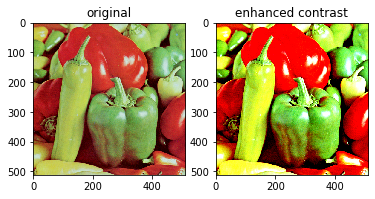

In [17]:
from PIL import Image
from PIL import ImageEnhance # 대비 변경 모듈
import matplotlib.pyplot as plt
import os

img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/peppers.png'
im = Image.open(img_path)                # original 이미지

enh = ImageEnhance.Contrast(im)    # enhanced contrast 이미지, Contrast클래스 객체 안에 im 넣는 작업
enh = enh.enhance(1.9) # 기존대비보다 90% 높여줌, 낮추려면 0 보다 작은 값을 인자로 넣어주기

# 두 이미지를 그려 봅시다
f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(enh)
im2.set_title("enhanced contrast")

#### 2-5. 이미지 필터

Text(0.5, 1.0, 'BLUR filter')

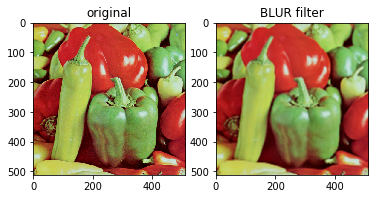

In [19]:
from PIL import ImageFilter

filtered_image = im.filter(ImageFilter.BLUR)  # BLUR filter 이미지

f=plt.figure()
im1 = f.add_subplot(1,2,1)
im1.imshow(im)
im1.set_title("original")

im2 = f.add_subplot(1,2,2)
im2.imshow(filtered_image)
im2.set_title("BLUR filter")

**필터 종류**
- BLUR : 이미지를 흐리게 만드는 필터입니다.
- EDGE_ENHANCE : 윤곽을 뚜렷하게 해주는 필터입니다.
- EMBOSS : 원본 이미지의 명암 경계에 따라 이미지의 각 픽셀을 밝은 영역 또는 어두운 영역으로 대체하는 필터입니다.
- FIND_EDGES : 윤곽만 표시해주는 필터입니다.
- SHARPEN : 경계선들을 더욱 날카롭게 해주어 선명도를 높이는 필터입니다.

#### 2-6. 이미지 색 공간 변경

In [20]:
print("이미지를 확인하세요.ᵕᴗᵕ")
greyscale_image = im.convert('L') # 원본 이미지의 색 공간 변환 --> 흑백으로 변환
greyscale_image.show()

이미지를 확인하세요.ᵕᴗᵕ


#### 2-7. 이미지 저장

In [21]:
from PIL import Image
import os
# jpeg 포맷 저장
original_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/peppers.png'
new_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/modified_peppers.jpg'

im = Image.open(original_img_path)
im.save(new_img_path)

new_im = Image.open(new_img_path)
print(new_im.format, new_im.size, new_im.mode)

JPEG (512, 512) RGB


In [22]:
# png 포맷
# PNG 포맷으로 저장합니다. 
another_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/modified_peppers.png'
im.save(another_img_path)

another_im = Image.open(another_img_path)
print(another_im.format, another_im.size, another_im.mode)

PNG (512, 512) RGB


### 3. 코드 모듈화
- 코드 재사용

In [23]:
# from 패키지 import 모듈
from PIL import Image  # 모듈이 들어있는 패키지 / 해당 패키지 안에 있는 각각의 모듈을 꺼내오는 부분
from PIL import ImageFile
from PIL import ImageMath, ImageEnhance
print("⁎ᵕᴗᵕ⁎")

⁎ᵕᴗᵕ⁎


In [24]:
import os

original_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/peppers.png'
new_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/modified_peppers.jpg'

im = Image.open(original_img_path)
im.save(new_img_path)

### 4. 실습
#### 4-1. 모듈 제작

In [27]:
from PIL import Image, ImageFilter

def image_resize(image, height):
    if height == 300:
        return image.resize((800, 300))
    else:
        return image.resize((800, 600))
    
def image_rotate(image):
    return image.transpose(Image.ROTATE_180)

def image_change_bw(image):
    return image.convert('L')

print("⁎ᵕᴗᵕ⁎")

⁎ᵕᴗᵕ⁎


#### 4-2. 모듈 사용
- 모듈 소스 코드 gedit에 저장

In [29]:
from PIL import Image
import os
import sys
sys.path.append(os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image')    # 우리가 추가한 모듈의 path를 sys.path에 임시로 추가해 줍니다. 

import image_processing as ip      # 위 추가한 path에서 image_processing.py 모듈을 가져와 임포트합니다. 

original_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/test.jpg'
result_img_path = os.getenv('HOME')+'/workplace/aiffel/Fundamentals/dataset/pil_image/assets/result_image.jpg'

def img_transfer(original_image, result_image):
    # 원본 이미지를 오픈합니다. 
    im = Image.open(original_img_path)

    # image_processing.image_resize 를 사용하여 (800,600)으로 resize합니다. 
    im_resized_600 = ip.image_resize(im, 600)
    
    # image_processing.image_resize 를 사용하여 (800,300)으로 resize합니다. 
    im_resized_300 = ip.image_resize(im, 300)

    # image_processing.image_rotate 를 사용하여 (800,300)짜리 이미지를 180도 회전합니다. 
    im_resized_300_rotate = ip.image_rotate(im_resized_300)

    # im_resized_600에 im_resized_300와 im_resized_300_rotate를 아래위로 붙입니다. 
    box_top = (0, 0, 800, 300)
    box_bottom = (0, 300, 800, 600)
    im_resized_600.paste(im_resized_300_rotate, box_top)
    im_resized_600.paste(im_resized_300, box_bottom)

    # image_processing.image_change_bw 를 사용하여 im_resized_600을 흑백으로 변환합니다.
    im_resized_600 = ip.image_change_bw(im_resized_600)

    # 이미지를 저장합니다. 
    im_resized_600.save(result_image)

# 함수를 호출해서 원본이미지를 새로운 이미지로 변환해서 저장해 봅시다.     
img_transfer(original_img_path, result_img_path)

# 만들어진 이미지를 화면에 출력해 봅시다. 
Image.open(result_img_path).show()

print("⁎ᵕᴗᵕ⁎")

⁎ᵕᴗᵕ⁎


#### 4-3. tkinter 로 이미지 변환 어플리케이션 만들기

In [31]:
from tkinter import *
import tkinter.ttk as ttk
from tkinter import filedialog
from PIL import Image,ImageTk

print('코드 실행 중..🛸')
window = Tk()
window.title("나의 이미지 편집기")

window.geometry("1240x600")

label1 = Label(window, text="이미지 편집전")
label2 = Label(window, text="이미지 편집후")
label1.place(x=200, y=20)
label2.place(x=800, y=20)

window.filename = None

def click1():
    window.filename = filedialog.askopenfilename(initialdir="~", title="Select image file")
    if window.filename:
        img = Image.open(window.filename)
        img = img.resize((600, 450), Image.ANTIALIAS)
        img = ImageTk.PhotoImage(img)
        label3 = Label(window, image=img)
        label3.image = img
        label3.place(x=20, y=50)
        
def click2():
    img_transfer(window.filename, 'result.png')
    img = Image.open('result.png')
    img = img.resize((600, 450), Image.ANTIALIAS)
    img = ImageTk.PhotoImage(img)
    label4 = Label(window, image=img)
    label4.image = img
    label4.place(x=620, y=50)

action1 = ttk.Button(window, text="이미지 선택", command=click1)  
action1.place(x=200, y=520)

action2 = ttk.Button(window, text="이미지 변환", command=click2)   
action2.place(x=800, y=520)

window.mainloop()
print('완료!')

코드 실행 중..🛸
완료!
